# *** US INFLATION ***

In [3]:
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from datetime import date
from numpy import log

sys.path.append(os.getcwd() + '/../..')
import macrodata as md

In [4]:
start_dt = date(2015, 1, 1)
end_dt = date(2023, 2, 1)

In [5]:
countries = ['US']
asset_classes = ['Inflation']

In [6]:
items = md.Explorer.countryAssetList(countries, asset_classes)['US']['Inflation']

In [19]:
db = md.Explorer.listHistory(items, start_dt, end_dt)

In [20]:
us_cpi = db[['us_cpi', 'us_cpi_core', 'us_cpi_food',
             'us_cpi_medicare', 'us_cpi_shelter',
             'us_cpi_rent_sa']].astype(float)
us_cpi_high = db[['us_cpi_energy', 'us_cpi_gasoline']].astype(float)

In [23]:
us_cpi_YoY = us_cpi.dropna().apply(lambda x : log(x), axis = 1).diff(periods = 12).dropna()
us_cpi_high_YoY = us_cpi_high.apply(lambda x : log(x), axis = 1).diff(periods = 12).dropna()
us_cpi_MoM = us_cpi.dropna().apply(lambda x : log(x), axis = 1).diff(periods = 1).dropna()
us_cpi_high_MoM = us_cpi_high.apply(lambda x : log(x), axis = 1).diff(periods = 1).dropna()

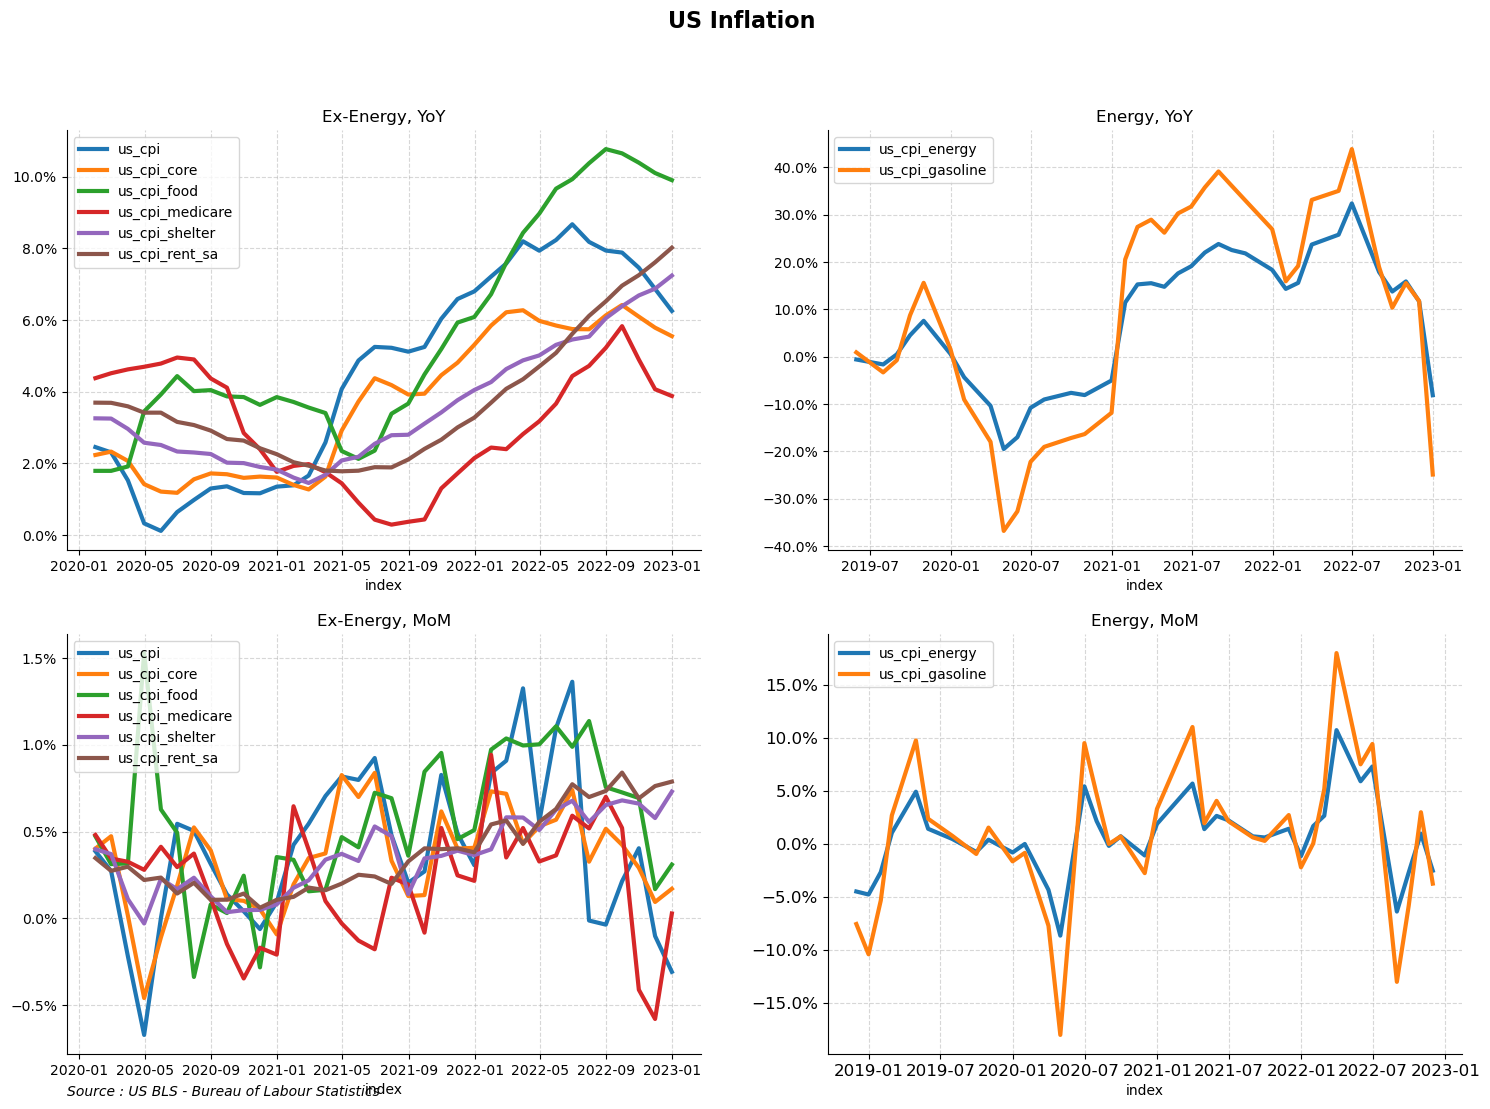

In [26]:
f, ax = plt.subplots(2,2, figsize=(18,12))
f.suptitle('US Inflation', fontsize = 16, fontweight = 'bold')

(us_cpi_YoY.iloc[-36:] * 100).plot(ax = ax[0, 0], lw = 3, title = 'Ex-Energy, YoY')
(us_cpi_high_YoY.iloc[-36:] * 100).plot(ax = ax[0, 1], lw = 3, title = 'Energy, YoY')
(us_cpi_MoM.iloc[-36:] * 100).plot(ax = ax[1, 0], lw = 3, title = 'Ex-Energy, MoM')
(us_cpi_high_MoM.iloc[-36:] * 100).plot(ax = ax[1, 1], lw = 3, title = 'Energy, MoM')

for a in ax.reshape(1,4)[0] :
    a.spines[['right', 'top']].set_visible(False)
    a.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
    a.grid(alpha = 0.5, ls = '--')

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax[1, 0].text(0, -0.1, 'Source : US BLS - Bureau of Labour Statistics',
              fontstyle = 'italic',
              transform = ax[1, 0].transAxes)

# plt.savefig('../_data/figs/USInflation.jpg')

In [ ]:
# Inflation correlations

In [10]:
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from datetime import date
from numpy import log

sys.path.append(os.getcwd() + '/../..')
import macrodata as md

In [11]:
start_dt = date(2020, 1, 1)
end_dt = date(2023, 2, 1)
items = ['us_ism_manufacturing', 'us_cpi', 'us_michigan_cons_conf']
db = md.Explorer.listHistory(items, start_dt, end_dt)

In [12]:
db['us_cpi'] = db['us_cpi'].map(log).diff()

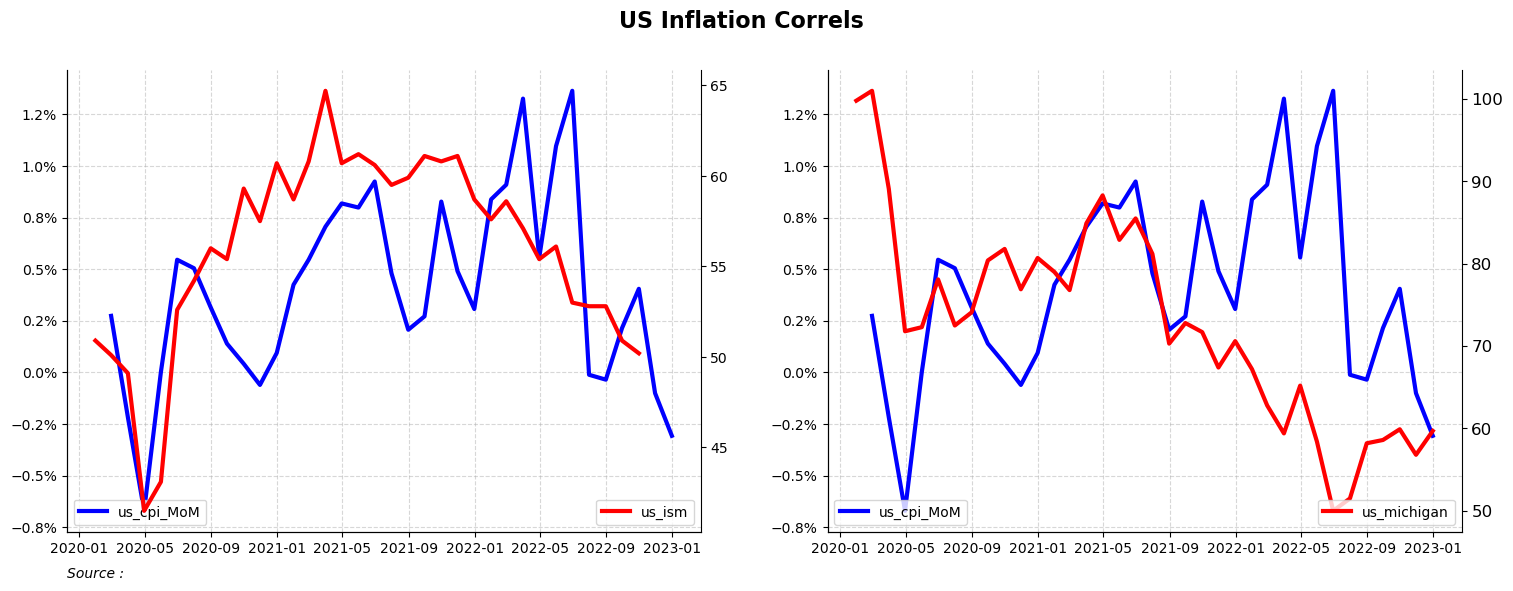

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18,6))
f.suptitle('US Inflation Correls', fontsize = 16, fontweight = 'bold')

ax[0].plot(db.index, db['us_cpi'] * 100, color = 'blue', lw = 3, label = 'us_cpi_MoM')
ax2 = ax[0].twinx()
ax2.plot(db.index, db['us_ism_manufacturing'], color = 'red', lw = 3, label = 'us_ism')
ax[1].plot(db.index, db['us_cpi'] * 100, color = 'blue', lw = 3, label = 'us_cpi_MoM')
ax3 = ax[1].twinx()
ax3.plot(db.index, db['us_michigan_cons_conf'], color = 'red', lw = 3, label = 'us_michigan')

for a in ax :
    a.spines['top'].set_visible(False)
    a.spines['right'].set_visible(False)
    a.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
    a.grid(alpha = 0.5, ls = '--')
    a.legend(loc = 'lower left')
    
ax2.spines['top'].set_visible(False)
ax2.legend(loc = 'lower right')
ax3.spines['top'].set_visible(False)
ax3.legend(loc = 'lower right')

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax[0].text(0, -0.1, 'Source : ',
              fontstyle = 'italic',
              transform = ax[0].transAxes)

In [ ]:
# Inflation Expectations

In [15]:
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from datetime import date
from numpy import log

sys.path.append(os.getcwd() + '/../..')
import macrodata as md

In [16]:
start_dt = date(2013, 1, 1)
end_dt = date(2023, 2, 1)
items = ['us_5v5_inflation', 'us_5y_be_inflation', 'us_10y_rate']
db = md.Explorer.listHistory(items, start_dt, end_dt)

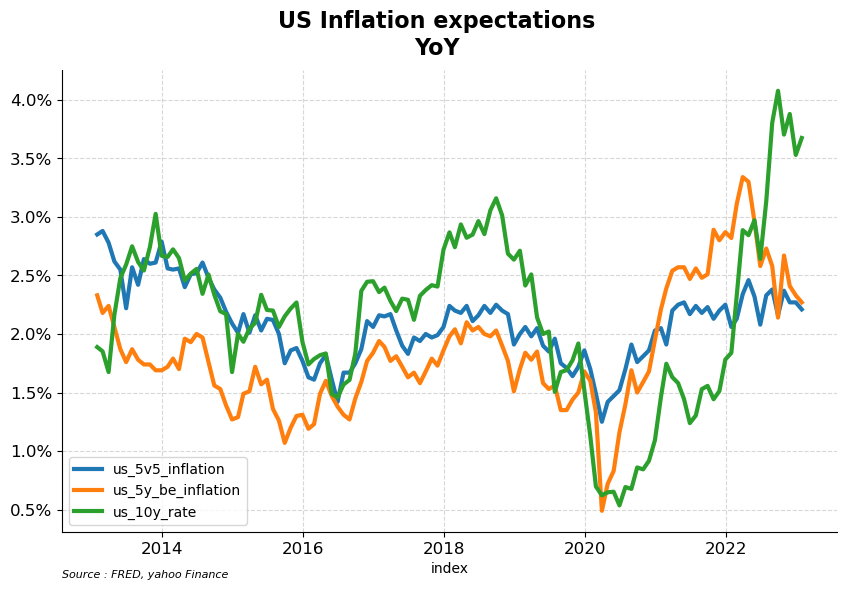

In [17]:
f, ax = plt.subplots(figsize=(10,6))
f.suptitle('US Inflation expectations\nYoY', fontsize = 16, fontweight = 'bold')

db.plot(ax = ax, lw = 3)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha = 0.5, ls = '--')
ax.legend(loc = 'lower left')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0, -0.1, 'Source : FRED, yahoo Finance',
              fontstyle = 'italic',
              fontsize = 8,
              transform = ax.transAxes)

# plt.savefig('../_data/figs/us_inf_exp.pdf')

# *** S&P vs 10Year **

In [ ]:
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from datetime import date
from numpy import log

sys.path.append(os.getcwd() + '/../..')
import macrodata as md

In [28]:
start_dt = date(1990, 1, 1)
end_dt = date(2023, 1, 8)

In [29]:
selection = ['SPY', 'us_10y_real_rate']

In [33]:
db = md.Explorer.listHistory(selection, start_dt, end_dt).dropna()

In [34]:
spy_norm = db['SPY'][50:-1] / db['SPY'][50]
us10Yreal_norm = db['us_10y_real_rate'][50:-1] / db['us_10y_real_rate'][50]

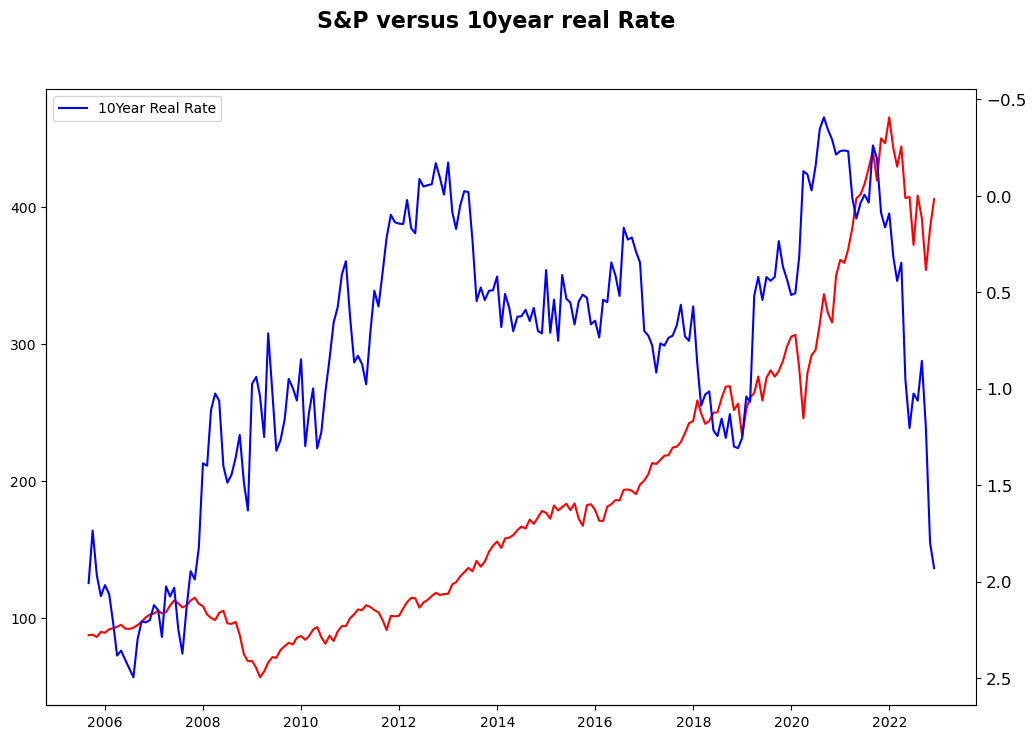

In [35]:
f, ax = plt.subplots(figsize=(12,8))
f.suptitle('S&P versus 10year real Rate', fontsize = 16, fontweight = 'bold')

ax.plot(db['SPY'][150:-1].index, db['SPY'][150:-1], color = 'r', label = 'SPY')
ax2 = ax.twinx()
ax2.plot(db['us_10y_real_rate'][150:-1].index, db['us_10y_real_rate'][150:-1], color = 'b', label = '10Year Real Rate')
ax2.invert_yaxis()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.legend()
void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

## Housing

In [5]:
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from datetime import date
from numpy import log

sys.path.append(os.getcwd() + '/../..')
import macrodata as md

In [6]:
start_dt = date(1990, 1, 1)
end_dt = date(2023, 1, 8)

In [7]:
items = md.Explorer.countrySubAssetList(['US'], ['housing'])['US']['housing']

In [8]:
db = md.Explorer.listHistory(items, start_dt, end_dt)

In [10]:
housing = db.apply(lambda x: log(x), axis = 1).diff().dropna()

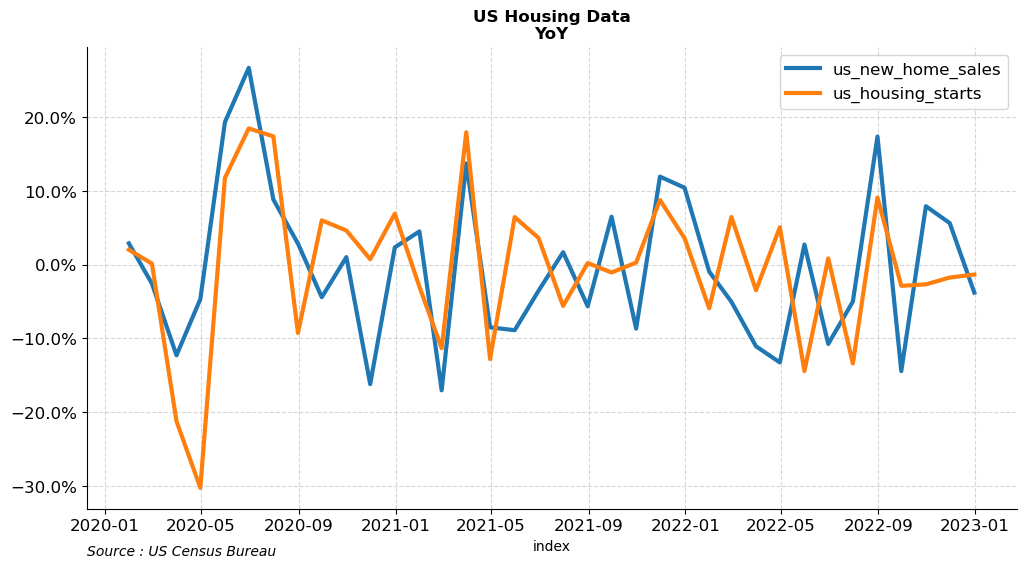

In [11]:
f, ax = plt.subplots(figsize = (12,6))

(housing.iloc[-36:] * 100).plot(ax = ax, lw = 3)

ax.grid(alpha = 0.5, ls = '--')
ax.set_title('US Housing Data\nYoY', fontweight = 'bold', fontsize = 12)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 1))
ax.legend(fontsize = 12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
   
void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)
void = ax.text(0, -0.1, 'Source : US Census Bureau',
              fontstyle = 'italic',
              transform = ax.transAxes)

# plt.savefig('us_housing.pdf')